<a id="goal"></a>
## Project Description and Goal

<font color="blue">

We've been offered an internship in the analytical department at Yandex.Afisha. 
The Goal is to help optimize marketing expenses.  
    
We have:    
  - Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
  - Dump file with all orders for the period
  - Marketing expenses statistics <br>   

We are going to study:
  - How people use the product
  - When they start to buy
  - How much money each customer brings
  - When they pay off
    

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import sys
import warnings

In [2]:
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [4]:
visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

## Conclusion 

<font color="blue">
We Downloaded 3 datasets: visits, orders and costs. <br>
Optimized the data and checked the data for missing values, duplicates and correct data type  

<a id="pro"></a>
## Step 2. Analysing the product 

- **How many people use the product every day, week, and month?**
    
to answer we calculate the DAU/WAU/MAU and build graphs that will show the dynamics of these metrics.

In [15]:
visits['session_year'] = visits['Start Ts'].astype('datetime64[Y]')
visits['session_month'] = visits['Start Ts'].astype('datetime64[M]')
visits['session_week'] = visits['Start Ts'].astype('datetime64[W]')
visits['session_date']  = visits['Start Ts'].dt.date

In [16]:
visits.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19


In [17]:
dau=visits.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()
dau.head()

,session_date,Uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [18]:
wau= visits.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).reset_index()
wau.head()

,session_year,session_week,Uid
0,2017-01-01,2017-06-01,4082
1,2017-01-01,2017-06-08,3311
2,2017-01-01,2017-06-15,2844
3,2017-01-01,2017-06-22,3079
4,2017-01-01,2017-06-29,3055


In [19]:
mau= visits.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).reset_index()
mau.head()

,session_year,session_month,Uid
0,2017-01-01,2017-06-01,13259
1,2017-01-01,2017-07-01,14183
2,2017-01-01,2017-08-01,11631
3,2017-01-01,2017-09-01,18975
4,2017-01-01,2017-10-01,29692


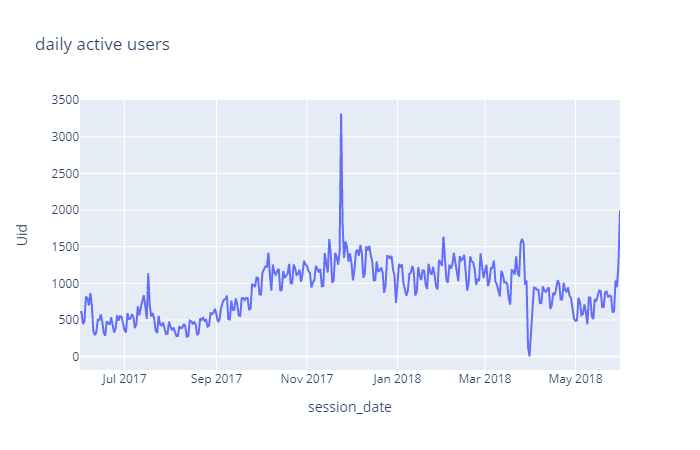

In [20]:
fig = px.line(dau, x="session_date", y="Uid", title='daily active users')
fig.show("png")

<font color="blue">
We see that the number of daily active users is usually between 500 and 1500. Once at the end of 2017, the number of daily active users reached about 3000 people, and once around April 2018, it was greatly reduced.  
    

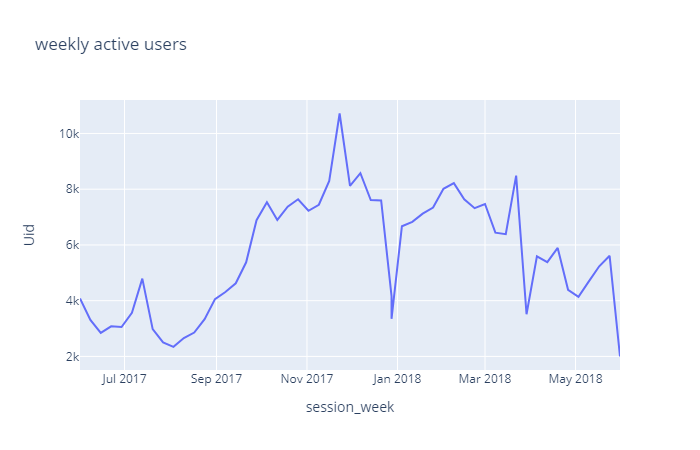

In [21]:
fig = px.line(wau, x="session_week", y="Uid", title='weekly active users')
fig.show("png")

<font color="blue">
the number of weekly active users is between 4000 and 8000. The lowest weekly visit is for the first week of June 2017 with 2000 visits and the highest weekly visit is for the 47th week of the year with 10000.

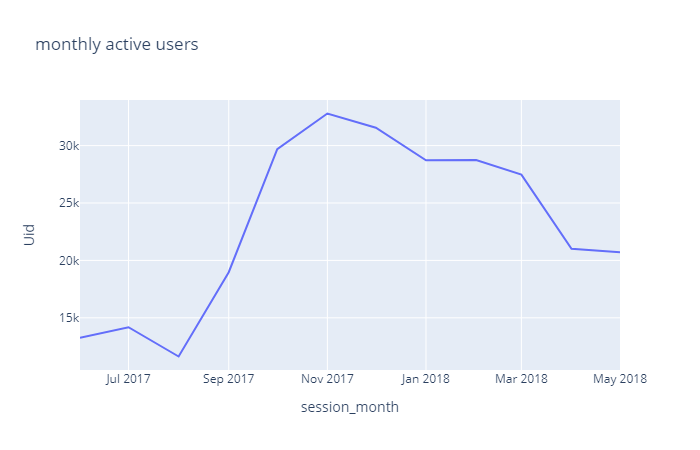

In [22]:
fig = px.line(mau, x="session_month", y="Uid", title='monthly active users')
fig.show("png")

<font color="blue">
August 2017 has the lowest number of monthly active users and November has the highest.

In [23]:
dau.mean()

Uid    907.991758
dtype: float64

In [24]:
mau.mean()

Uid    23228.416667
dtype: float64

In [25]:
wau.mean()

Uid    5621.703704
dtype: float64

<font color="blue">
Average number of active users are: 
    
  - 908 users per day
  - 5622 users per week
  - 23228 users per month   

In [26]:
sticky_wau=dau.mean()/wau.mean()*100
sticky_wau

Uid    16.151541
dtype: float64

In [27]:
sticky_mau=dau.mean()/mau.mean()*100
sticky_mau

Uid    3.90897
dtype: float64

    
 - **How many sessions are there per day?**


In [28]:
visits.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19


In [29]:
sessions_per_day= visits.groupby('session_date').agg({'Uid': 'count'}).reset_index()

In [30]:
sessions_per_day.head()

,session_date,Uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


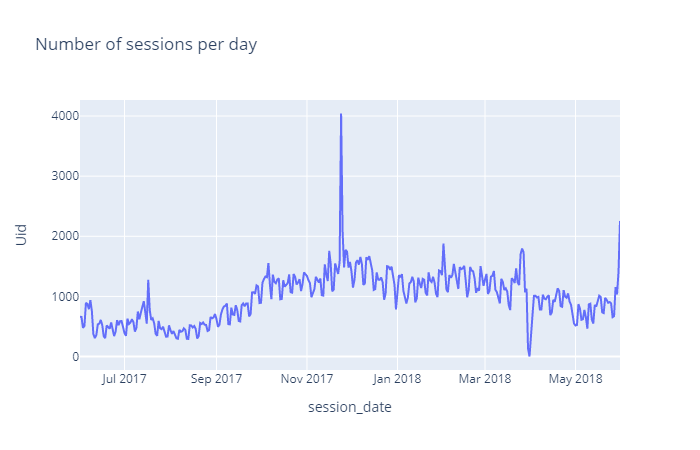

In [31]:
fig = px.line(sessions_per_day, x='session_date', y='Uid', title='Number of sessions per day')
fig.show("png")

In [32]:
sessions_per_day['Uid'].mean()

987.3626373626373

In [33]:
visits.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20


<font color="blue">
On average 987 visits are made per day.

In [34]:
visits_desktop=visits.query('Device=="desktop"')
visits_touch=visits.query('Device=="touch"')

In [35]:
desktop_sessions=visits_desktop.groupby(['session_date']).agg({'Uid': 'count'}).reset_index()

In [36]:
touch_sessions=visits_touch.groupby(['session_date']).agg({'Uid': 'count'}).reset_index()

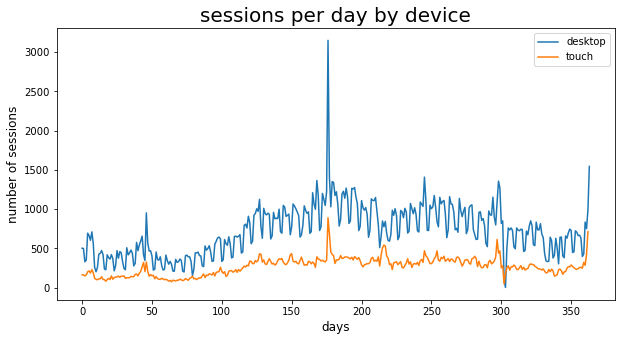

In [37]:
plt.figure(figsize=(10,5))
plt.plot(desktop_sessions['Uid'], label='desktop')
plt.plot(touch_sessions['Uid'],label='touch')
plt.title('sessions per day by device', fontsize=20)
plt.xlabel('days', fontsize=12)
plt.ylabel('number of sessions', fontsize=12)
plt.legend(loc='upper right')
plt.show()

<font color="blue">
We see that more sessions are made per day by desktop platform than touch.  

- **What is the length of each session?**

In [38]:
visits['session_duration_sec'] = (visits['End Ts'] - visits['Start Ts']).dt.seconds

In [39]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0


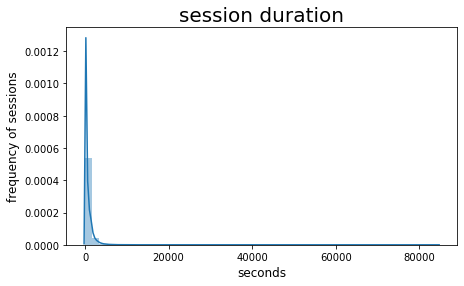

In [40]:
plt.figure(figsize=(7,4))
sns.distplot(visits['session_duration_sec'])
plt.title('session duration', fontsize=20)
plt.xlabel('seconds',fontsize=12)
plt.ylabel('frequency of sessions',fontsize=12);

In [41]:
visits['session_duration_sec'].mode()[0]

60

<font color="blue">
We calculate the session duration in seconds and check the distribution.
Because the distribution is not normal, we use the mode instead of average. So the lenght of each session is 60 seconds on average.



 - **How often do users come back?**


We would calculate the retention Rate.

In [42]:
visits.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080


In [43]:
first_session_date = visits.groupby(['Uid'])['session_date'].min().reset_index()
first_session_date.columns=['Uid','first_session_date']

In [44]:
first_session_date.head(2)

,Uid,first_session_date
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06


In [45]:
visits = visits.merge(first_session_date, on='Uid')
visits.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19


In [46]:
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session month'] = visits['session_date'].astype('datetime64[M]')
visits.head(1)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,session month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-01,2017-12-01


In [47]:
visits['age'] = visits['session month'] - visits['first_session_month']
visits['age'] = visits['age'] / np.timedelta64(1,'M')
visits['age'] = visits['age'].round().astype(int)
visits['first_session_month']=visits['first_session_month'].dt.strftime('%Y-%m')

In [48]:
visits.sample(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,session month,age
171384,desktop,2017-11-01 16:09:00,4,2017-11-01 15:53:00,10163023224979482319,2017-01-01,2017-11-01,2017-10-26,2017-11-01,960,2017-10-05,2017-10,2017-11-01,1
299711,desktop,2017-11-05 09:37:00,3,2017-11-05 09:36:00,11463202516436260898,2017-01-01,2017-11-01,2017-11-02,2017-11-05,60,2017-11-05,2017-11,2017-11-01,0


In [49]:
cohorts = visits.groupby(['first_session_month','age']).agg({'Uid':'nunique'}).reset_index()
cohorts.head()

,first_session_month,age,Uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909


In [50]:
initial_users_count = cohorts[cohorts['age'] == 0][['first_session_month','Uid']]
initial_users_count.head()

,first_session_month,Uid
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977


In [51]:
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
initial_users_count

,first_session_month,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [52]:
cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts.head(2)

,first_session_month,age,Uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259


In [53]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
cohorts.head(5)

,first_session_month,age,Uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


In [54]:
retention_pivot = cohorts.pivot_table(index='first_session_month', columns='age', values='retention', aggfunc='sum')

In [55]:
retention_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


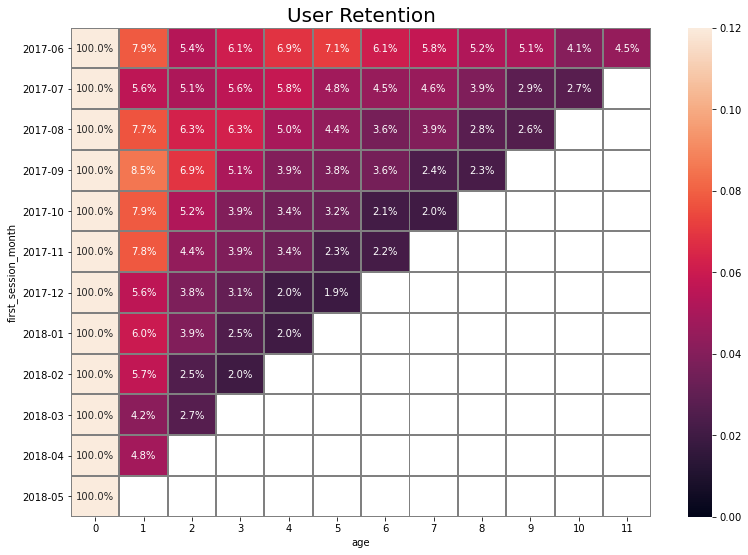

In [56]:
plt.figure(figsize=(13, 9))
plt.title('User Retention', fontsize=20)
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0 , vmax=0.12)
plt.show()

<font color="blue">
We observe the monthly retention rate. The retention rate for all months is below 9%. It is decreasing in all months except June, which sometimes increases slightly.

## Conclusion 

<font color="blue">
    
**Active users**
    
Average number of active users are:     
  - 908 users per day
  - 5622 users per week
  - 23228 users per month  

**Number of visits** 
    
 - Most visits are in the months: November, December and Oktober.
 - On average 987 visits are made per day.
 - More sessions are made per day by desktop platform than touch.
 - The lenght of each session is 60 seconds on average.
 
**Retention rate** 
    
The Retention rate for all months is below 9% (less than one out of every 10 users returns). It is declining in all cohorts as well as over time. Only the June cohort has a relatively stable Retention rate and is sometimes accompanied by an increase.  

<a id="sale"></a>
## step 3:  Analysing the Sale

 - **When do people start buying?**

It is about Conversion. We find the first order and first visit for each user. Find the difference in days between them. Then find the average Conversion time by source and platform.

In [57]:
orders.head(1)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


In [58]:
orders['order_date']  = orders['Buy Ts'].dt.date

In [59]:
first_order_date=orders.groupby(['Uid'])['order_date'].min().reset_index()

In [60]:
first_order_date.head(2)

,Uid,order_date
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03


In [61]:
first_dates=first_session_date. merge(first_order_date, on='Uid')
first_dates.columns=['Uid','first_visit_date','first_order_date']
first_dates.head(3)

,Uid,first_visit_date,first_order_date
0,313578113262317,2017-09-18,2018-01-03
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11


In [62]:
first_dates['conversion time']=first_dates['first_order_date']-first_dates['first_visit_date']

In [63]:
first_dates.describe()

,Uid,conversion time
count,3.652300e+04,36523
mean,9.213152e+18,16 days 21:30:05.864797524
std,5.324792e+18,47 days 01:42:31.695799156
min,3.135781e+14,0 days 00:00:00
25%,4.615081e+18,0 days 00:00:00
50%,9.245161e+18,0 days 00:00:00
75%,1.383709e+19,2 days 00:00:00
max,1.844617e+19,363 days 00:00:00


In [64]:
first_dates['conversion time']=first_dates['conversion time'] / np.timedelta64(1, 'D')

In [65]:
first_dates['conversion time']=first_dates['conversion time'].astype(int)
first_dates.head(5)

,Uid,first_visit_date,first_order_date,conversion time
0,313578113262317,2017-09-18,2018-01-03,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-27,2018-01-28,1
4,2551852515556206,2017-11-24,2017-11-24,0


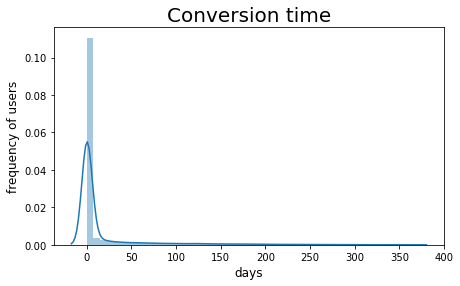

In [66]:
plt.figure(figsize=(7,4))
sns.distplot(first_dates['conversion time'])
plt.title('Conversion time', fontsize=20)
plt.xlabel('days',fontsize=12)
plt.ylabel('frequency of users',fontsize=12);

In [67]:
first_dates['conversion time'].mode()[0]

0

<font color="blue">
Because the convertion time distribution is highly skewed, we use the mode instead of average. So, users usually start buying on the first visit day.

    
 - **How many orders do they make during a given period of time?**
    

In [68]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
orders.head(1)

,Buy Ts,Revenue,Uid,order_date,order_month
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01


In [69]:
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns=['Uid','first_order_month']
first_orders

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [70]:
orders_ = pd.merge(orders,first_orders, on='Uid')
orders_ .head(2)

,Buy Ts,Revenue,Uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01


In [71]:
cohorts_n_orders = orders_.groupby(['first_order_month','order_month']).agg({'order_date': 'count'}).reset_index()

In [72]:
cohorts_n_orders.head() 

,first_order_month,order_month,order_date
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [73]:
cohorts_n_orders ['age'] = (cohorts_n_orders ['order_month'] - cohorts_n_orders ['first_order_month']) / np.timedelta64(1, 'M')
cohorts_n_orders ['age'] = cohorts_n_orders ['age'].round().astype('int')

In [74]:
cohorts_n_orders.head()

,first_order_month,order_month,order_date,age
0,2017-06-01,2017-06-01,2354,0
1,2017-06-01,2017-07-01,177,1
2,2017-06-01,2017-08-01,174,2
3,2017-06-01,2017-09-01,226,3
4,2017-06-01,2017-10-01,292,4


In [75]:
cohorts_n_orders['first_order_month']=cohorts_n_orders['first_order_month'].dt.strftime('%Y-%m')

In [76]:
cohorts_n_orders_pivot = cohorts_n_orders .pivot_table(
    index='first_order_month', 
    columns='age', 
    values='order_date', 
    aggfunc='mean')
cohorts_n_orders_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN
2017-09,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN
2017-10,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN
2017-11,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN
2017-12,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


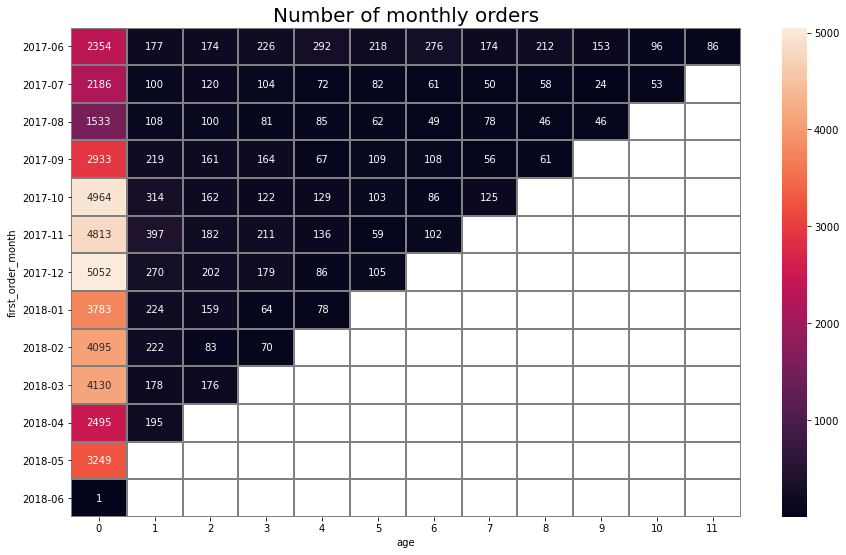

In [77]:
plt.figure(figsize=(15, 9))
plt.title('Number of monthly orders', fontsize=20)
sns.heatmap(cohorts_n_orders_pivot, annot=True, fmt='.4g', linewidths=1, linecolor='gray') 
plt.show()

<font color="blue">

In the heatmap chart of the number of monthly orders we can see that:
    
 - The highest order quantity was in December 2017.
 - For all cohorts, the number of orders in the second month has decreased significantly.
 - In most cohorts, the number of orders has gradually decreased in different months.

In [78]:
orders.head(2)

,Buy Ts,Revenue,Uid,order_date,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01


In [79]:
orders.join(visits['Source Id']).groupby('Source Id').agg({'order_date':'count','Uid':'nunique'})

,order_date,Uid
Source Id,,
1,11587,9842
2,13649,11495
3,7119,6285
4,8741,7599
5,6538,5775
9,1456,1348
10,1325,1230


<font color="blue">
grouping the orders by sources, we see the most orders are related to source 2 and 1.

In [80]:
orders.join(visits['Device']).groupby('Device').agg({'order_date':'count'})

,order_date
Device,
desktop,41658
touch,8757


<font color="blue">
we see the most orders are related to desktop platform.

  - **What is the average purchase size?**

In [81]:
orders_.head(2)

,Buy Ts,Revenue,Uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01


In [82]:
cohorts_revenue = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()

In [83]:
cohorts_revenue.head()

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [84]:
cohorts_revenue=cohorts_revenue.join(cohorts_n_orders['age'])

In [85]:
cohorts_revenue['first_order_month_']=cohorts_revenue['first_order_month'].dt.strftime('%Y-%m')

In [86]:
cohorts_revenue_pivot = cohorts_revenue.pivot_table(
    index='first_order_month_', 
    columns='age', 
    values='Revenue', 
    aggfunc='mean').round()
cohorts_revenue_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_,,,,,,,,,,,,
2017-06,9557.0,982.0,885.0,1931.0,2069.0,1488.0,1923.0,1177.0,1119.0,1226.0,1156.0,520.0
2017-07,11558.0,645.0,1199.0,690.0,340.0,300.0,231.0,273.0,310.0,283.0,299.0,NaN
2017-08,7229.0,647.0,628.0,536.0,677.0,388.0,289.0,555.0,400.0,258.0,NaN,NaN
2017-09,14569.0,2884.0,1345.0,10262.0,1034.0,1670.0,1811.0,628.0,475.0,NaN,NaN,NaN
2017-10,21716.0,2325.0,831.0,682.0,658.0,522.0,368.0,501.0,NaN,NaN,NaN,NaN
2017-11,21036.0,1629.0,814.0,1326.0,604.0,220.0,469.0,NaN,NaN,NaN,NaN,NaN
2017-12,20767.0,1141.0,4055.0,4669.0,1372.0,1482.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,13949.0,994.0,1026.0,482.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,15177.0,1016.0,287.0,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


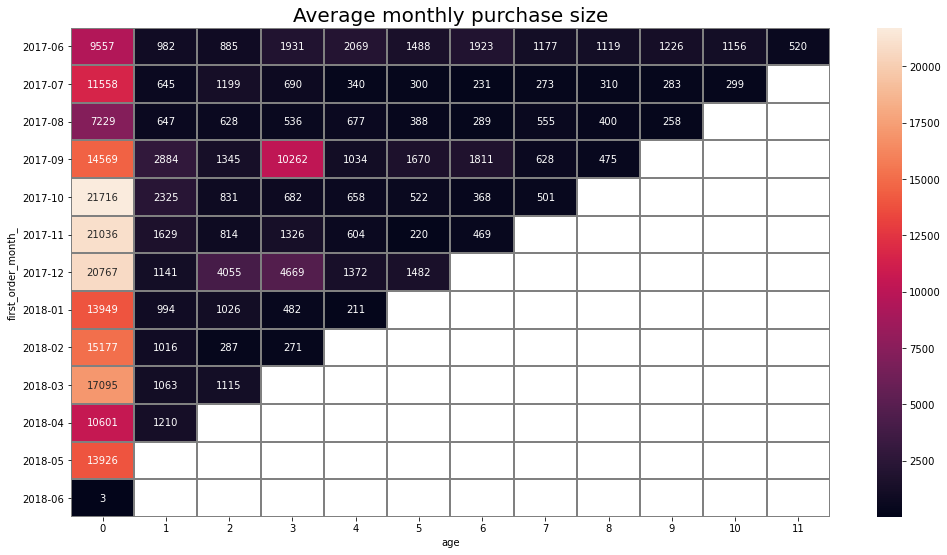

In [87]:
plt.figure(figsize=(17, 9))
plt.title('Average monthly purchase size', fontsize=20)
sns.heatmap(cohorts_revenue_pivot, annot=True, fmt='.5g', linewidths=1, linecolor='gray') 
plt.show()

<font color="blue">
    
In the heatmap chart of the average purchase size, we can see that:
    
 - The highest purchase quantity was in Oktober 2017.
 - For all cohorts, the purchase size in the second month has decreased significantly.
 - In most cohorts, the purchase size gradually decreases in different months.
 - The September cohort(users registerd in sep) has a large increase in sales on the fourth month.
 - Also the December cohort has high sales on the third and fourth months.

  - **How much money do they bring? (LTV)**

In [88]:
orders.head(1)

,Buy Ts,Revenue,Uid,order_date,order_month
0,2017-06-01 00:10:00,17.0,10329302124590727494,2017-06-01,2017-06-01


In [89]:
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [90]:
orders_

,Buy Ts,Revenue,Uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-01


In [91]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [92]:
cohorts_revenue

,first_order_month,order_month,Revenue,age,first_order_month_
0,2017-06-01,2017-06-01,9557.49,0,2017-06
1,2017-06-01,2017-07-01,981.82,1,2017-06
2,2017-06-01,2017-08-01,885.34,2,2017-06
3,2017-06-01,2017-09-01,1931.30,3,2017-06
4,2017-06-01,2017-10-01,2068.58,4,2017-06
...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2,2018-03
75,2018-04-01,2018-04-01,10600.69,0,2018-04
76,2018-04-01,2018-05-01,1209.92,1,2018-04
77,2018-05-01,2018-05-01,13925.76,0,2018-05


In [93]:
report_ltv = pd.merge(cohort_sizes, cohorts_revenue, on='first_order_month')

In [94]:
report_ltv

,first_order_month,n_buyers,order_month,Revenue,age,first_order_month_
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06
1,2017-06-01,2023,2017-07-01,981.82,1,2017-06
2,2017-06-01,2023,2017-08-01,885.34,2,2017-06
3,2017-06-01,2023,2017-09-01,1931.30,3,2017-06
4,2017-06-01,2023,2017-10-01,2068.58,4,2017-06
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,2018-03
75,2018-04-01,2276,2018-04-01,10600.69,0,2018-04
76,2018-04-01,2276,2018-05-01,1209.92,1,2018-04
77,2018-05-01,2988,2018-05-01,13925.76,0,2018-05


In [95]:
report_ltv['ltv'] = report_ltv['Revenue'] / report_ltv['n_buyers']
report_ltv.head(2)

,first_order_month,n_buyers,order_month,Revenue,age,first_order_month_,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,2017-06,0.485329


In [96]:
result_ltv = report_ltv.pivot_table(
    index='first_order_month_', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')
result_ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
result_ltv=result_ltv.cumsum(axis=1).round(2)
result_ltv

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,NaN
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,NaN,NaN
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,NaN,NaN,NaN
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.40,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,5.00,5.92,6.99,7.30,7.64,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,4.43,4.73,4.88,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,4.44,4.51,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


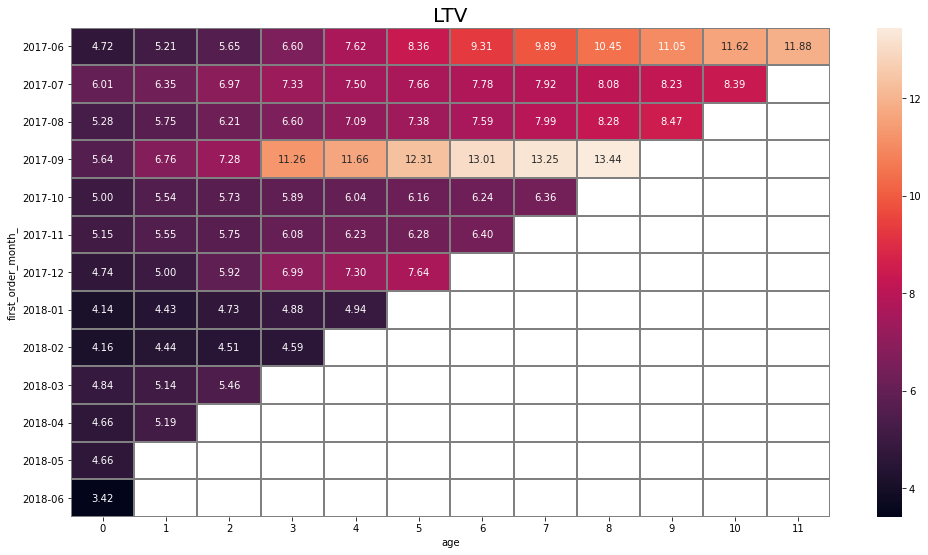

In [98]:
plt.figure(figsize=(17, 9))
plt.title('LTV', fontsize=20)
sns.heatmap(result_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 
plt.show()

<font color="blue">
   
 - The highest ltv was in July 2017.
 - In most cohorts, ltv increases by months.
 - By September cohort(users registerd in sep) ltv increased on the third month significantly.
 - By December cohort ltv increased on the third month. 

## Conclusion 

<font color="blue">
    
users usually start buying on the first visit day.

        
**number of orders**
    
  -	The highest monthly order quantity was in December 2017.(5052 orders)
  -	For all cohorts, the number of orders in the first month has decreased significantly.
  -	In most cohorts, the number of orders has gradually decreased in different months.
    
  - most orders are related to source 2 and 1. (2,1,4,3,5,9,10)
  - most orders are related to desktop platform.
 
**purchase size**
    
 - The highest monthly average purchase quantity was in Oktober 2017.(21716)
 - For all cohorts, the purchase size in the first month has decreased significantly.
 - In most cohorts, the purchase size has gradually decreased in different months.
 - The September cohort(users registerd in sep) has a large increase in sales on the third month.
 - Also the December cohort has high sales on the third and fourth months.

**LTV**
    
  -	The highest ltv was in July 2017.(6.01)
  - In most cohorts, ltv has increased by months.
  - By September cohort(users registerd in sep) ltv increased on the third month significantly.
  - By December cohort ltv increased on the third month.
  - The ltv for source 2 is higher and for source 3 lower.
  - The ltv for both platforms are fast the same, a little more on desktop.


<a id="market"></a>
## step 4: Analysing the Marketing

  - **How much money was spent? Overall/per source/over time**
  - **How much did customer acquisition from each of the sources cost?**
  - **How worthwhile where the investments? (ROI)**

In [99]:
costs.head(2)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25


In [100]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [101]:
monthly_costs = costs.groupby('month')['costs'].sum()
monthly_costs

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

In [102]:
report_romi = pd.merge(report_ltv, monthly_costs, left_on='first_order_month', right_on='month')
report_romi

,first_order_month,n_buyers,order_month,Revenue,age,first_order_month_,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,2017-06,4.724414,18015.00
1,2017-06-01,2023,2017-07-01,981.82,1,2017-06,0.485329,18015.00
2,2017-06-01,2023,2017-08-01,885.34,2,2017-06,0.437637,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,3,2017-06,0.954671,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,4,2017-06,1.022531,18015.00
...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,2018-03,0.300892,30415.27
74,2018-03-01,3533,2018-05-01,1114.87,2,2018-03,0.315559,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,0,2018-04,4.657597,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,1,2018-04,0.531599,22289.38


In [103]:
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']

In [104]:
report_romi['romi'] = report_romi['ltv'] / report_romi['cac']

In [105]:
result_romi = report_romi.pivot_table(
    index='first_order_month_', 
    columns='age', 
    values='romi', 
    aggfunc='mean')
result_romi 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_,,,,,,,,,,,,
2017-06,0.530530,0.054500,0.049145,0.107205,0.114825,0.082593,0.106730,0.065310,0.062123,0.068027,0.064150,0.028844
2017-07,0.633623,0.035339,0.065735,0.037845,0.018638,0.016451,0.012673,0.014951,0.016998,0.015513,0.016412,NaN
2017-08,0.488747,0.043719,0.042468,0.036243,0.045762,0.026263,0.019513,0.037515,0.027067,0.017412,NaN,NaN
2017-09,0.597833,0.118368,0.055174,0.421091,0.042425,0.068533,0.074310,0.025753,0.019489,NaN,NaN,NaN
2017-10,0.597866,0.064015,0.022869,0.018776,0.018109,0.014381,0.010134,0.013797,NaN,NaN,NaN,NaN
2017-11,0.554931,0.042980,0.021483,0.034983,0.015934,0.005800,0.012373,NaN,NaN,NaN,NaN,NaN
2017-12,0.542015,0.029785,0.105824,0.121860,0.035797,0.038670,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.416173,0.029662,0.030620,0.014368,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.463807,0.031048,0.008760,0.008272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
result_romi=result_romi.cumsum(axis=1).round(2)
result_romi

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month_,,,,,,,,,,,,
2017-06,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


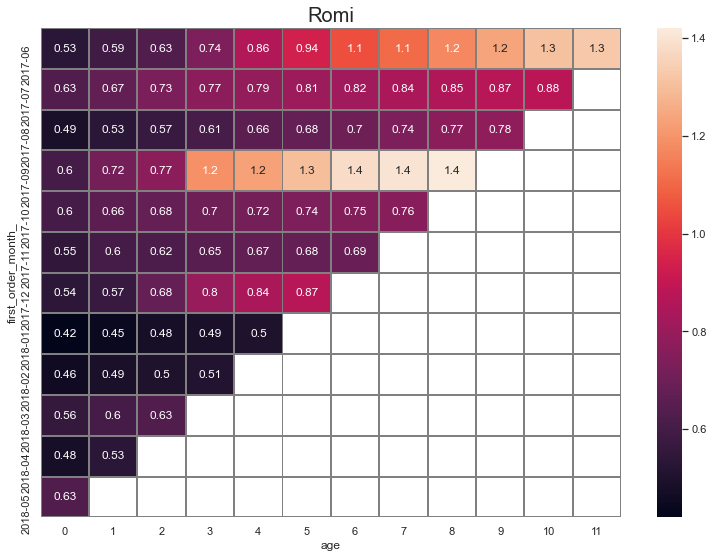

In [107]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Romi' , fontsize=20)
sns.heatmap(result_romi, annot=True, linewidths=1, linecolor='gray'); 

<font color="blue">
    
  - The June cohort paid off in the 6th month (ROMI = 1.1). 
  - The September cohort also paid off in the 4th month (ROMI = 1.2).

In [108]:
orders.join(visits['Source Id'])

,Buy Ts,Revenue,Uid,order_date,order_month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,4
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,5
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,9
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,4
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,3
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,4


In [109]:
report_source=orders.join(visits['Source Id']).groupby('Source Id').agg({'Revenue': 'sum', 'Uid':'nunique'}).reset_index()
report_source

,Source Id,Revenue,Uid
0,1,52745.39,9842
1,2,73135.68,11495
2,3,32640.25,6285
3,4,44335.16,7599
4,5,34837.07,5775
5,9,7476.87,1348
6,10,6886.78,1230


In [110]:
report_source['ltv'] = report_source['Revenue'] / report_source['Uid']
report_source.columns=['source','revenue','n_buyers','ltv']
report_source.sort_values('ltv', ascending=False)

,source,revenue,n_buyers,ltv
1,2,73135.68,11495,6.362391
4,5,34837.07,5775,6.032393
3,4,44335.16,7599,5.834341
6,10,6886.78,1230,5.599008
5,9,7476.87,1348,5.546639
0,1,52745.39,9842,5.359215
2,3,32640.25,6285,5.193357


<font color="blue">
Calculating the ltv for different sources, the ltv for source 2 is higher and for source 3 lower.     

In [111]:
report_device=orders.join(visits['Device']).groupby('Device').agg({'Revenue': 'sum', 'Uid':'nunique'}).reset_index()
report_device

,Device,Revenue,Uid
0,desktop,206097.93,31138
1,touch,45959.27,7513


In [112]:
report_device['ltv'] = report_device['Revenue'] / report_device['Uid']
report_device.columns=['device','revenue','n_buyers','ltv']
report_device

,device,revenue,n_buyers,ltv
0,desktop,206097.93,31138,6.618856
1,touch,45959.27,7513,6.117299


<font color="blue">
The ltv for both platforms are fast the same, a little more on desktop. 

In [113]:
costs.sample(5)

,source_id,dt,costs,month
1679,5,2018-01-14,197.52,2018-01-01
2532,10,2018-05-22,21.70,2018-05-01
1584,5,2017-10-11,168.86,2017-10-01
613,2,2018-02-06,124.81,2018-02-01
223,1,2018-01-10,81.81,2018-01-01


In [114]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


   
 - **How much money was spent? Overall/per source/over time**
    

In [115]:
costs['costs'].sum()

329131.62

<font color="blue">
total costs are 329132.

In [116]:
daily_costs=costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
daily_costs.head()

,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


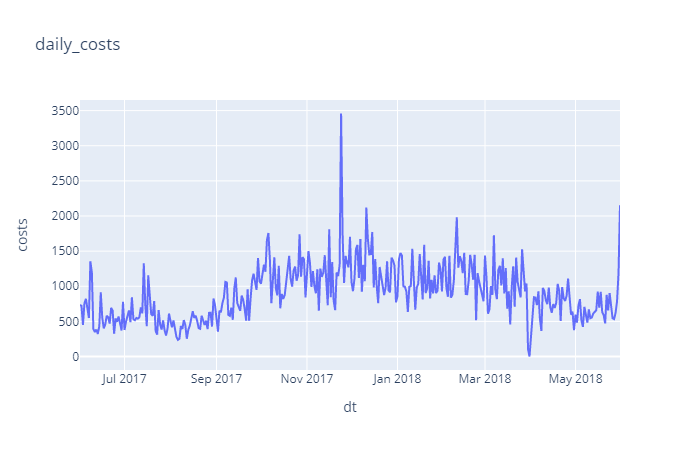

In [117]:
fig = px.line(daily_costs, x='dt' , y='costs', title='daily_costs')
fig.show("png")

<font color="blue">
daily costs are usually between 500 and 1500. Once at the end of 2017, the cost reached about 3500, and once around April 2018, it was greatly reduced.  

In [118]:
costs['dt'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-01,62.25,2017-06-01
2,1,2017-06-01,36.53,2017-06-01
3,1,2017-06-01,55.00,2017-06-01
4,1,2017-06-01,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-01,9.92,2018-05-01
2538,10,2018-05-01,21.26,2018-05-01
2539,10,2018-05-01,11.32,2018-05-01
2540,10,2018-05-01,33.15,2018-05-01


In [119]:
costs['dt'] = costs['dt'].astype('datetime64[M]')
costs['dt']=costs['dt'].dt.strftime('%Y-%m')
costs

,source_id,dt,costs,month
0,1,2017-06,75.20,2017-06-01
1,1,2017-06,62.25,2017-06-01
2,1,2017-06,36.53,2017-06-01
3,1,2017-06,55.00,2017-06-01
4,1,2017-06,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05,9.92,2018-05-01
2538,10,2018-05,21.26,2018-05-01
2539,10,2018-05,11.32,2018-05-01
2540,10,2018-05,33.15,2018-05-01


In [120]:
monthly_costs=costs.groupby('dt').agg({'costs': 'sum'}).reset_index()
monthly_costs.sort_values('costs')

,dt,costs
2,2017-08,14790.54
0,2017-06,18015.00
1,2017-07,18240.59
11,2018-05,22224.27
10,2018-04,22289.38
3,2017-09,24368.91
9,2018-03,30415.27
8,2018-02,32723.03
7,2018-01,33518.52
4,2017-10,36322.88


<font color="blue">
December and November are the most costly months, August and June are the least costly months.

In [121]:
costs_per_source=costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_per_source.sort_values('costs')

,source_id,costs
5,9,5517.49
6,10,5822.49
0,1,20833.27
1,2,42806.04
4,5,51757.10
3,4,61073.60
2,3,141321.63


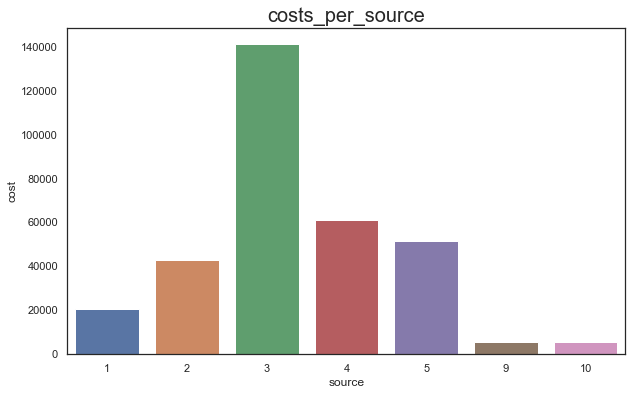

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(x='source_id', y='costs', data=costs_per_source)
plt.title('costs_per_source', fontsize=20)
plt.xlabel('source',fontsize=12)
plt.ylabel('cost',fontsize=12)
plt.show()

<font color="blue">
Source 9 is the least costly source and source 3 the most costly one. 

In [123]:
visits.head(2)

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,session month,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02,2018-02-01,0


In [124]:
costs.head(5)

,source_id,dt,costs,month
0,1,2017-06,75.20,2017-06-01
1,1,2017-06,62.25,2017-06-01
2,1,2017-06,36.53,2017-06-01
3,1,2017-06,55.00,2017-06-01
4,1,2017-06,57.08,2017-06-01


In [125]:
monthly_costs.head()

,dt,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88


In [126]:
report_source.head(3)

,source,revenue,n_buyers,ltv
0,1,52745.39,9842,5.359215
1,2,73135.68,11495,6.362391
2,3,32640.25,6285,5.193357


In [127]:
costs_per_source.head(3)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63


In [128]:
report_source_romi = pd.merge(report_source, costs_per_source, left_on='source', right_on='source_id')
report_source_romi['cac'] = report_source_romi['costs'] / report_source_romi['n_buyers']
report_source_romi

,source,revenue,n_buyers,ltv,source_id,costs,cac
0,1,52745.39,9842,5.359215,1,20833.27,2.116772
1,2,73135.68,11495,6.362391,2,42806.04,3.723883
2,3,32640.25,6285,5.193357,3,141321.63,22.485542
3,4,44335.16,7599,5.834341,4,61073.60,8.037058
4,5,34837.07,5775,6.032393,5,51757.10,8.962268
5,9,7476.87,1348,5.546639,9,5517.49,4.093093
6,10,6886.78,1230,5.599008,10,5822.49,4.733732


In [129]:
report_source_romi['romi'] = report_source_romi['ltv'] / report_source_romi['cac']

In [130]:
report_source_romi

,source,revenue,n_buyers,ltv,source_id,costs,cac,romi
0,1,52745.39,9842,5.359215,1,20833.27,2.116772,2.531786
1,2,73135.68,11495,6.362391,2,42806.04,3.723883,1.708536
2,3,32640.25,6285,5.193357,3,141321.63,22.485542,0.230964
3,4,44335.16,7599,5.834341,4,61073.60,8.037058,0.725930
4,5,34837.07,5775,6.032393,5,51757.10,8.962268,0.673088
5,9,7476.87,1348,5.546639,9,5517.49,4.093093,1.355122
6,10,6886.78,1230,5.599008,10,5822.49,4.733732,1.182789


<font color="blue">
calculating romi by sources:
sources 1,2,9,10 payd off but sources with highest costs like 3,4,5 didn't pay off.

## step 5: Overall Conclusion

<font color="blue">
    
### [Goal](#goal)
The Goal is to help optimize marketing expenses.
    
### [Product Analysis](#pro) 
 
**Active users**
    
Average number of active users are:     
  - 908 users per day
  - 5622 users per week
  - 23228 users per month  

**Number of visits** 
    
 - Most visits are in the months: November, December and Oktober.
 - On average 987 visits are made per day.
 - More sessions are made per day by desktop platform than touch.
 - The lenght of each session is 60 seconds on average.
 
**Retention rate** 
    
The Retention rate for all months is below 9% (less than one out of every 10 users returns). It is declining in all cohorts as well as over time. Only the June cohort has a relatively stable Retention rate and is sometimes accompanied by an increase.    
  
### [Sales Analysis](#sale) 
    
**Conversion time**    
users usually start buying on the first visit day.

        
**Number of orders**
    
  -	The highest monthly order quantity was in December 2017.(5052 orders)
  -	For all cohorts, the number of orders in the first month has decreased significantly.
  -	In most cohorts, the number of orders has gradually decreased in different months.
    
  - most orders are related to source 2 and 1. (2,1,4,3,5,9,10)
  - most orders are related to desktop platform.
 
**Purchase size**
    
 - The highest monthly average purchase quantity was in Oktober 2017.(21716)
 - For all cohorts, the purchase size in the first month has decreased significantly.
 - In most cohorts, the purchase size has gradually decreased in different months.
 - The September cohort(users registerd in sep) has a large increase in sales on the third month.
 - Also the December cohort has high sales on the third and fourth months.

**LTV**
    
  -	The highest ltv was in July 2017.(6.01)
  - In most cohorts, ltv has increased by months.
  - By September cohort(users registerd in sep) ltv increased on the third month significantly.
  - By December cohort ltv increased on the third month.
  - The ltv for source 2 is higher and for source 3 lower.
  - The ltv for both platforms are fast the same, a little more on desktop.

### [Marketing Analysis](#market)    
    
**ROMI**    
  - The June cohort paid off in the 5th month (ROMI = 1.1). 
  - The September cohort also paid off in the 4th month (ROMI = 1.2).
  - sources 1,2,9,10 payd off but sources with highest costs like 3,4,5 didn't pay off.    

**Costs**
  - total costs are 329132.
  - daily costs are usually between 500 and 1500. Once at the end of 2017, the cost reached about 3500, and once around April 2018, it was greatly reduced.
  - December and November are the most costly months, August and June are the least costly months.
  - Source 9 is the least costly source and source 3 the most costly one.
    
### Suggestions    
Source 2 had higher ltv and number of orders and also had payed off.So it would be recommended. 
platform desktop would be recommended too, because more visits and more orders was made by this platform. ltv and Romi is also higher for the group of customers who registered in June and September. It is suggested that more advertisements be made in these two months.       
    
    
   